In [1]:
from tensorflow.keras.applications import VGG16
import tensorflow as tf
with tf.device("/cpu:0"):
    conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
    conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

original_dataset_dir = "C:/Users/galin/Downloads/Python/kagglecatsanddogs_3367a/PetImages"
base_dir = "C:/Users/galin/Downloads/Python/cats_and_dogs_small"

train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

with tf.device("/cpu:0"):

    datagen = ImageDataGenerator(rescale=1./255)
    batch_size=20

    def extract_features(directory, sample_count):
        features = np.zeros(shape=(sample_count, 4, 4, 512))
        labels = np.zeros(shape=(sample_count))
        generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size, class_mode="binary")
        i = 0
        for input_batch, labels_batch in generator:
            features_batch = conv_base.predict(input_batch)
            features[i * batch_size : (i + 1) * batch_size] = features_batch
            labels[i * batch_size : (i + 1) * batch_size] = labels_batch
            i += 1
            if i * batch_size >= sample_count:
                break
        return features, labels

    train_features, train_labels = extract_features(train_dir, 2000)
    validation_features, validation_labels = extract_features(validation_dir, 1000)
    test_features, test_labels = extract_features(test_dir, 1000)

    train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
    validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
    test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Dense(256, activation="relu", input_dim=4*4*512))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation="sigmoid"))
    
    model.compile(optimizer=RMSprop(lr=2e-5), loss="binary_crossentropy", metrics=["acc"])
    
    history = model.fit(train_features, train_labels, epochs=30, batch_size=20, validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 5s 44ms/step - loss: 0.6765 - acc: 0.5932 - val_loss: 0.4410 - val_acc: 0.8490
Epoch 2/30
100/100 [==============================] - 3s 31ms/step - loss: 0.4458 - acc: 0.7978 - val_loss: 0.3649 - val_acc: 0.8490
Epoch 3/30
100/100 [==============================] - 3s 32ms/step - loss: 0.3642 - acc: 0.8426 - val_loss: 0.3249 - val_acc: 0.8720
Epoch 4/30
100/100 [==============================] - 3s 33ms/step - loss: 0.3271 - acc: 0.8575 - val_loss: 0.3067 - val_acc: 0.8750
Epoch 5/30
100/100 [==============================] - 3s 34ms/step - loss: 0.2992 - acc: 0.8744 - val_loss: 0.2806 - val_acc: 0.8920
Epoch 6/30
100/100 [==============================] - 4s 36ms/step - loss: 0.2563 - acc: 0.8979 - val_loss: 0.2697 - val_acc: 0.9000
Epoch 7/30
100/100 [==============================] - 3s 35ms/step - loss: 0.2593 - acc: 0.8990 - val_loss: 0.2611 - val_acc: 0.8940
Epoch 8/30
100/100 [==============================] - 3s 33ms/step - 

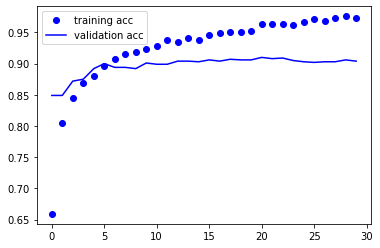

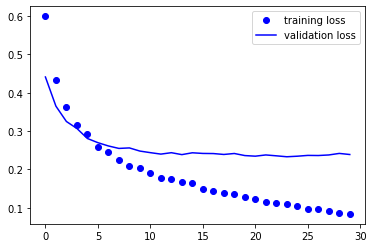

In [4]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "bo", label="training acc")
plt.plot(epochs, val_acc, "b", label="validation acc")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="training loss")
plt.plot(epochs, val_loss, "b", label="validation loss")
plt.legend()

plt.show()

In [1]:
from tensorflow.keras.applications import VGG16
import tensorflow as tf
with tf.device("/cpu:0"):
    conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
    conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

with tf.device("/cpu:0"):
    model = Sequential()
    model.add(conv_base)
    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [5]:
print(len(model.trainable_weights))
conv_base.trainable = False
print(len(model.trainable_weights))

30
4


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
with tf.device("/cpu:0"):
    train_datagen = ImageDataGenerator(
        rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
        shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode="nearest"
    )
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir, target_size=(150, 150), batch_size=20, class_mode="binary"
    )
    validation_generator = test_datagen.flow_from_directory(
        validation_dir, target_size=(150, 150), batch_size=20, class_mode="binary"
    )
    
    model.compile(loss="binary_crossentropy", optimizer=RMSprop, metrics=["acc"])
    history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50, verbose=2)


In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable == True:
        layer.trainable = True
    else:
        layer.trainable = False

In [4]:
from tensorflow.keras.models import load_model
import tensorflow as tf
with tf.device("/cpu:0"):
    model = load_model("C:/Users/galin/Downloads/Python/cats_and_dogs_small/cats_and_dogs_small_2.h5")
    model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)      

(1, 150, 150, 3)


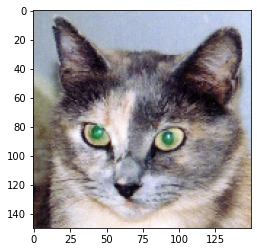

In [7]:
img_path = "C:/Users/galin/Downloads/Python/cats_and_dogs_small/test/cats/cat.1700.jpg"

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

with tf.device("/cpu:0"):
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)

    img_tensor /= 255
    print(img_tensor.shape)

plt.imshow(img_tensor[0])
plt.show()

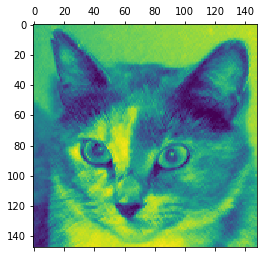

In [11]:
from tensorflow.keras import models
with tf.device("/cpu:0"):
    layer_outputs = [layer.output for layer in model.layers[:8]]
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(img_tensor)
    first_layer_activation = activations[0]
    plt.matshow(first_layer_activation[0, :, :, 30], cmap="viridis")
    plt.show()

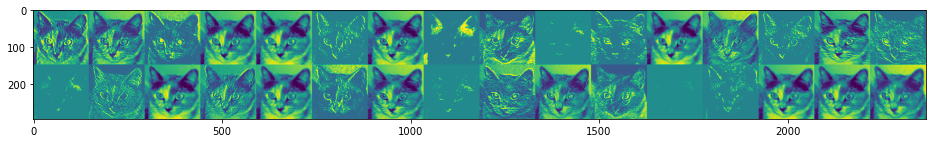

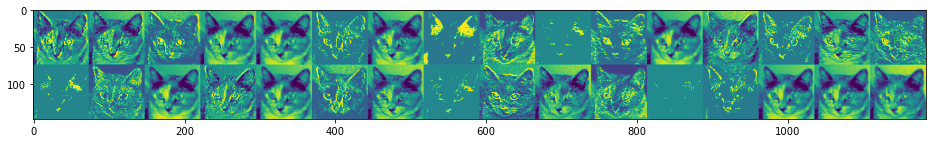

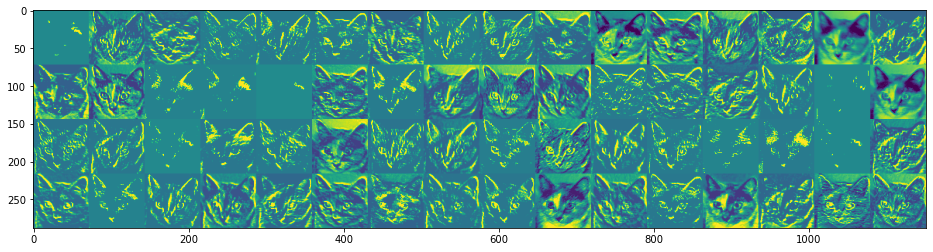

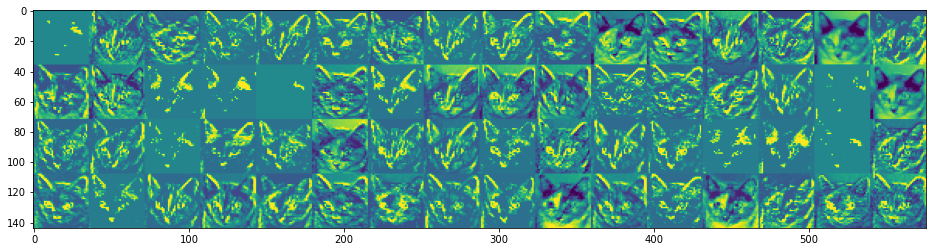

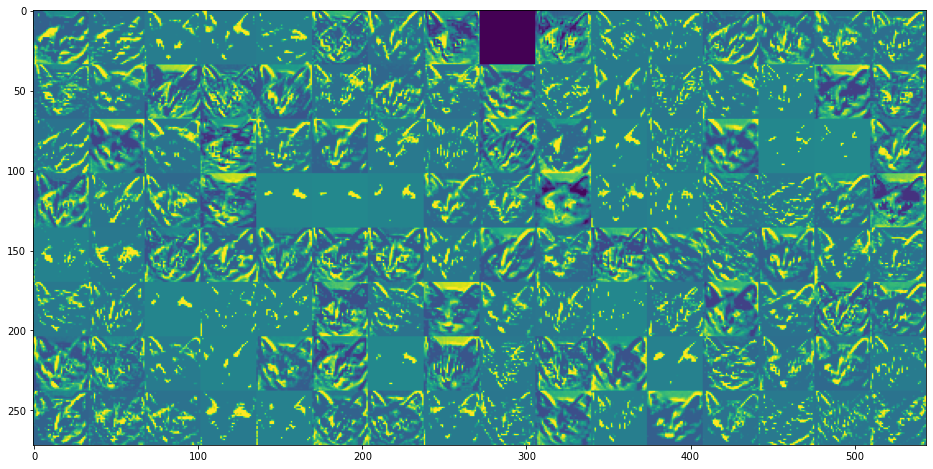

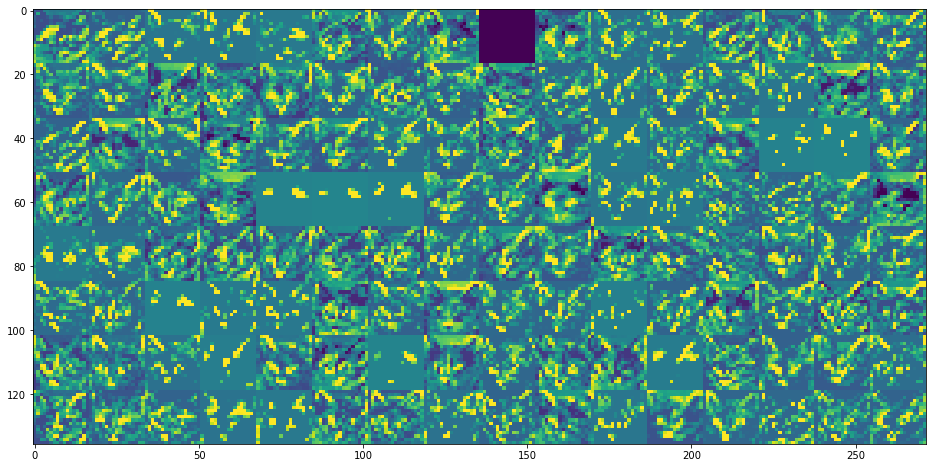

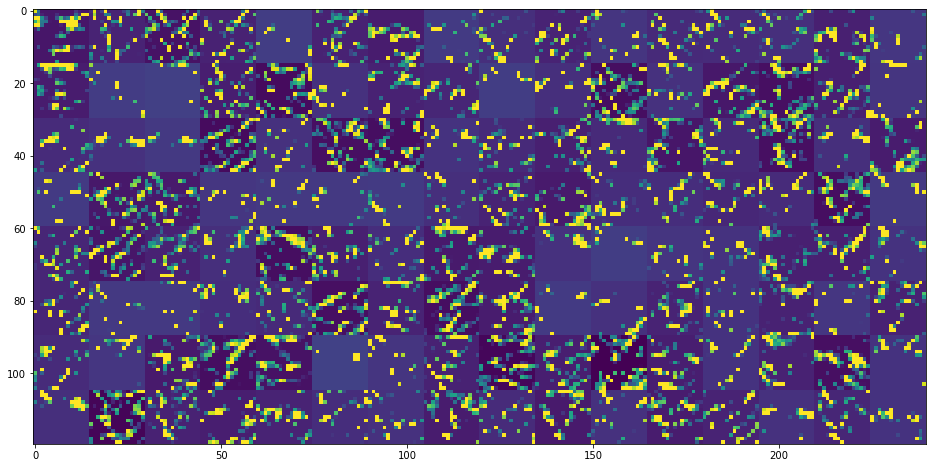

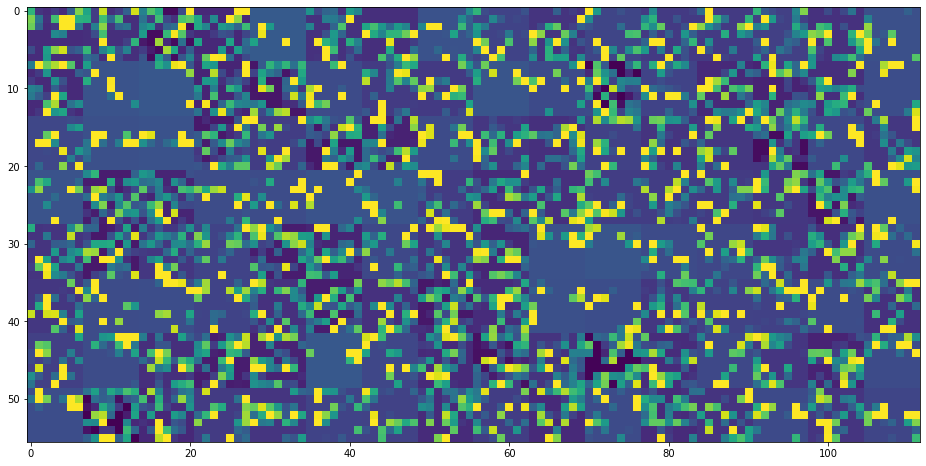

In [13]:
with tf.device("/cpu:0"):
    layer_names = []
    for layer in model.layers[:8]:
        layer_names.append(layer.name)
    
    images_per_row = 16
    
    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype("uint8")
                display_grid[col * size : (col + 1) *size, row * size : (row + 1) * size] = channel_image
                
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.grid(False)
        plt.imshow(display_grid, aspect="auto", cmap="viridis")
    plt.show()

In [22]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K
import numpy as np
import tensorflow as tf
tf.compat.v1.disable_eager_execution()


with tf.device("/cpu:0"):
    model = VGG16(weights="imagenet", include_top=False)
    layer_name = "block3_conv1"
    filter_index = 0
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])
    
    input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        


In [23]:
with tf.device("/cpu:0"):
    def deprocess_image(x):
        x -= x.mean()
        x /= (x.std() + 1e-5)
        x *= 0.1
        x += 0.5
        x = np.clip(x, 0, 1)
        x *= 255
        x = np.clip(x, 0, 255).astype("uint8")
        return x

    def generate_pattern(layer_name, filter_index, size=150):
        layer_output = model.get_layer(layer_name).output
        loss = K.mean(layer_output[:, :, :, filter_index])

        grads = K.gradients(loss, model.input)[0]
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
        iterate = K.function([model.input], [loss, grads])
        loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

        input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
        step = 1.
        for i in range(40):
            loss_value, grads_value = iterate([input_img_data])
            input_img_data += grads_value * step
        img = input_img_data[0]
        return deprocess_image(img)

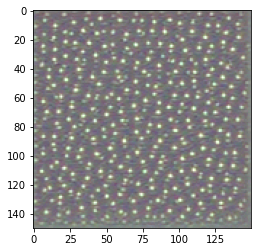

In [25]:
plt.imshow(generate_pattern("block3_conv1", 0))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


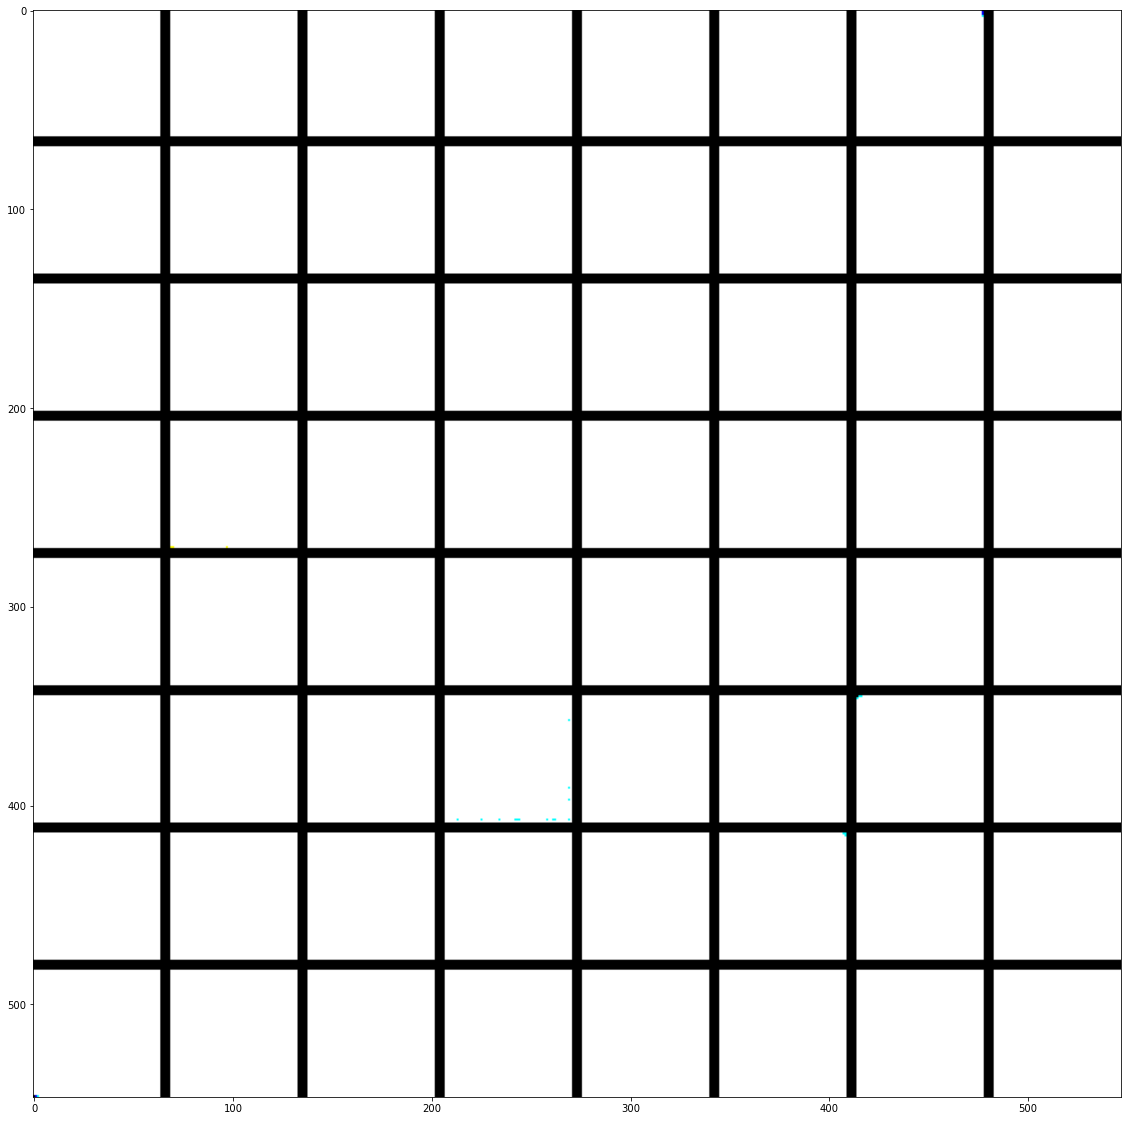

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


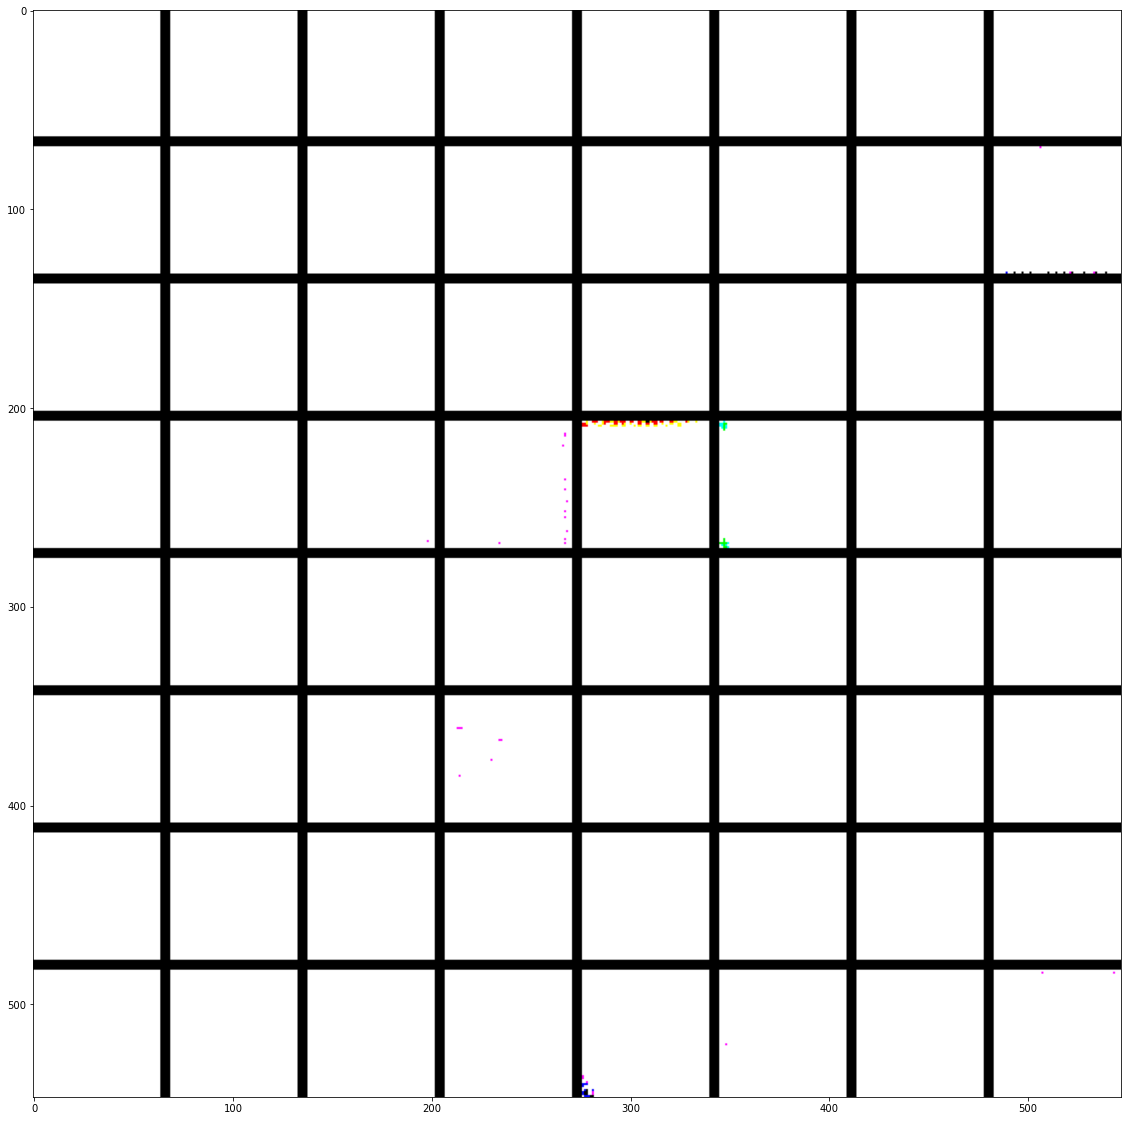

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


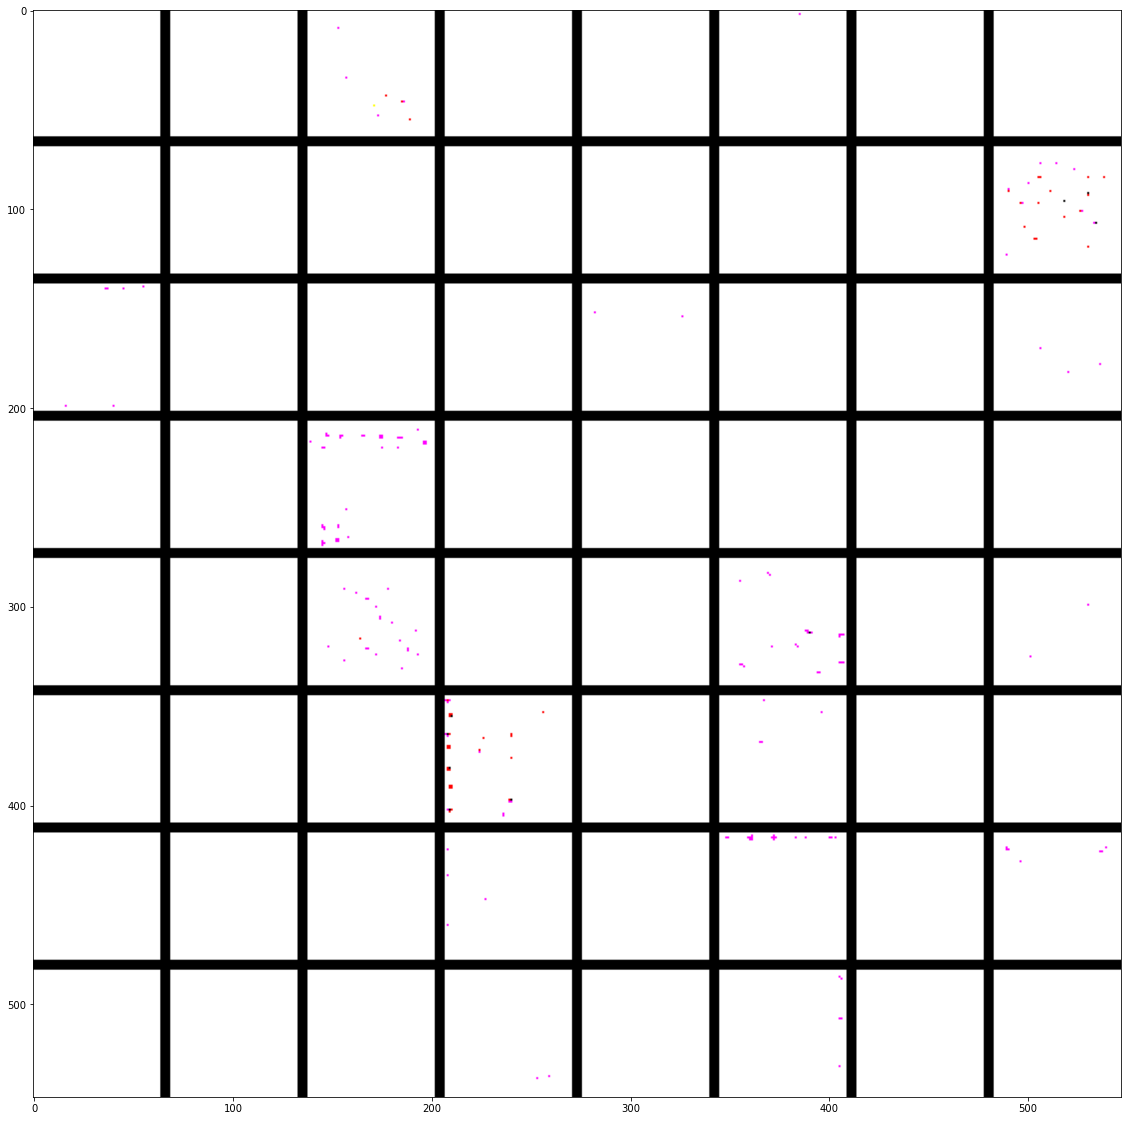

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


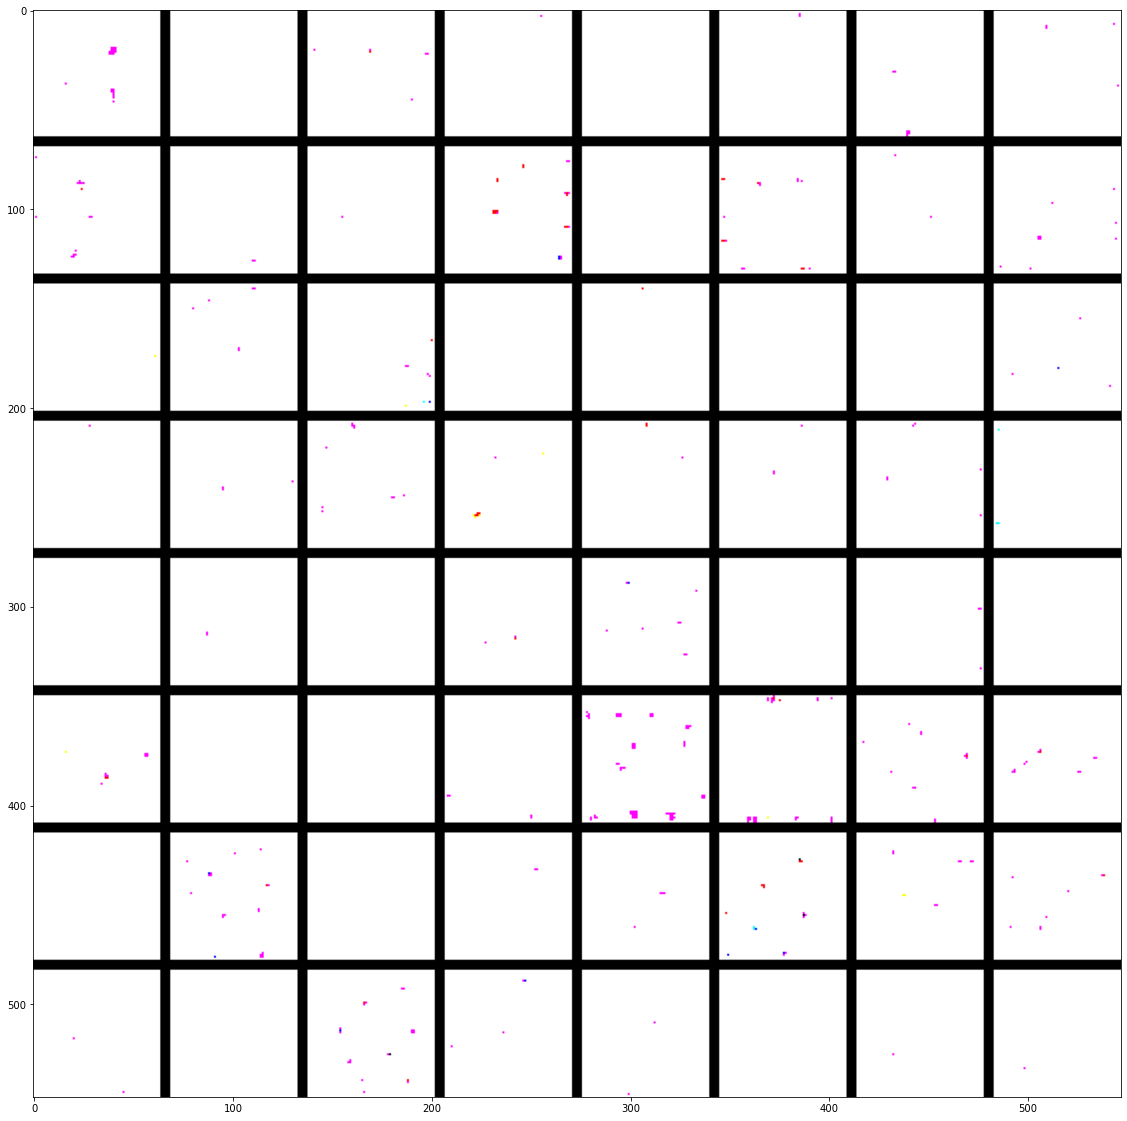

In [29]:
with tf.device("/cpu:0"):
    layers = ["block1_conv1", "block2_conv1", "block3_conv1", "block4_conv1"]
    for layer_name in layers:
        size = 64
        margin = 5
        results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))
        for i in range(8):
            for j in range(8):
                filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
                horizontal_start = i * size + i * margin
                horizontal_end = horizontal_start + size
                vertical_start = j * size + j * margin
                vertical_end = vertical_start + size
                results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img
        plt.figure(figsize=(20,20))
        plt.imshow(results)
        plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

img_path = ""
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)

x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print(preds)

african_elephant_output = model.output[:, 386]
last_conv_layer = model.get_layer("block5_conv3")
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=1)
heatmap = np.paximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORM)